# Introducing Network Analysis
Using NetworkX, we can build a graphic network representing the game board.

In [18]:
import pandas as pd

df = pd.read_csv("routes.csv")
df.head(5)

,city_a,city_a_formatted,city_b,city_b_formatted,distance,color,tunnel,ferry,ferry_count,lat_city_a,long_city_a,lat_city_b,long_city_b
0,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Blue,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
1,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Orange,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
2,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
3,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
4,London,"London, England",Amsterdam,"Amsterdam, Netherlands",2,Grey,0,1,2.0,51.507218,-0.127586,52.367573,4.904139


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
G = nx.from_pandas_edgelist(df, source='city_a', target='city_b', edge_attr=True)
G

# Calculations
Here we can see how the network analysis works on an individual level. In this example, we are finding the shortest path between Paris, France and Edinburgh, Scotland. We see the shortest path would mean traveling the following route: 
Paris --> Dieppe --> London --> Edinburgh

In [21]:
nx.shortest_path(G, 'Paris', 'Edinburgh', weight='Distance')


['Paris', 'Dieppe', 'London', 'Edinburgh']

In [22]:
nx.shortest_path_length(G, 'Paris', 'Edinburgh', weight='Distance')

3

In [23]:
df2 = pd.read_csv('tickets.csv')
df2.head()
df2.columns = df2.columns.str.lower().str.replace(' ','_')

routes = df2.to_dict('records') 
#routes

## Looping through our data 
Applying the same calculations in the example above, but for the entire dataset. 

In [24]:
# #nx.shortest_path(G, df['city_a'], df['city_b'], weight='Distance')
#routes = df.to_dict('records') 

shortest_routes = []
for route in routes: 
    try:
        paths = nx.shortest_path(G, route['city_a'], route['city_b'], weight='Distance')
        shortest_routes.append(paths)
        #print(paths)
        shortest_routes.append(paths)
    except: 
        #print(f'problem!!')
        pass


In [25]:
#shortest_routes

# Drawing it out
Now that we have our shortest paths, we can render them in a network graph. The colors in the visualization shown below correspond with the colors of the routes on the board. 

In [30]:
edges = list(G.edges())
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['distance'] for u,v in edges]
labels = {node: node for node in G.nodes()}

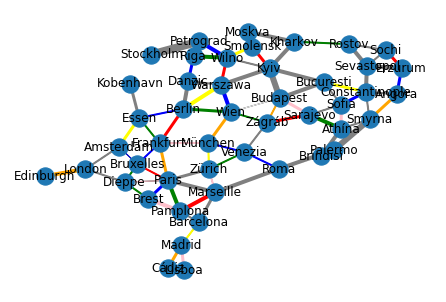

In [31]:
pos = nx.spring_layout(G, weight='Distance', scale=10, iterations=100)
nx.draw(G, pos)
nx.draw_networkx_edges(G, pos, width=weights, edge_color=colors)
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show()